In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from scipy import stats


In [2]:
currency = pd.read_csv('/content/Foreign_Exchange_Rates (1).csv', na_values= 'ND', parse_dates=['Time Serie'])
currency 

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,...,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94


In [3]:
currency.dropna(inplace = True)
currency.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [4]:
selected_currencies = currency[['Time Serie','UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'SOUTH AFRICA - RAND/US$', 'INDIA - INDIAN RUPEE/US$']]
selected_currencies

,Time Serie,UNITED KINGDOM - UNITED KINGDOM POUND/US$,SOUTH AFRICA - RAND/US$,INDIA - INDIAN RUPEE/US$
0,2000-01-03,0.6146,6.126,43.55
1,2000-01-04,0.6109,6.085,43.55
2,2000-01-05,0.6092,6.070,43.55
3,2000-01-06,0.6070,6.080,43.55
4,2000-01-07,0.6104,6.057,43.55
...,...,...,...,...
5211,2019-12-24,0.7719,14.143,71.23
5213,2019-12-26,0.7688,14.132,71.28
5214,2019-12-27,0.7639,14.025,71.45
5215,2019-12-30,0.7610,14.056,71.30


In [5]:
selected_currencies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5015 entries, 0 to 5216
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5015 non-null   datetime64[ns]
 1   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5015 non-null   float64       
 2   SOUTH AFRICA - RAND/US$                    5015 non-null   float64       
 3   INDIA - INDIAN RUPEE/US$                   5015 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 195.9 KB


In [6]:
selected_currencies.describe()

,UNITED KINGDOM - UNITED KINGDOM POUND/US$,SOUTH AFRICA - RAND/US$,INDIA - INDIAN RUPEE/US$
count,5015.000000,5015.000000,5015.000000
mean,0.640466,9.422128,52.726249
std,0.082562,2.831540,9.678708
min,0.473800,5.615000,38.480000
25%,0.587500,7.113750,45.250000
50%,0.636500,8.167100,48.100000
75%,0.692400,11.626250,62.440000
max,0.828700,16.884500,74.330000


In [7]:
 #set the date as the index before periodic resampling
selected_currencies.set_index('Time Serie', inplace=True)

selected_currencies.head()

,UNITED KINGDOM - UNITED KINGDOM POUND/US$,SOUTH AFRICA - RAND/US$,INDIA - INDIAN RUPEE/US$
Time Serie,,,
2000-01-03,0.6146,6.126,43.55
2000-01-04,0.6109,6.085,43.55
2000-01-05,0.6092,6.070,43.55
2000-01-06,0.6070,6.080,43.55
2000-01-07,0.6104,6.057,43.55


In [8]:
#aggregate the data by 10 years downsampling, we can have different aggregation like sum, mean,last,firstmedian, mode etc
selected_currencies.resample('4AS').mean()

,UNITED KINGDOM - UNITED KINGDOM POUND/US$,SOUTH AFRICA - RAND/US$,INDIA - INDIAN RUPEE/US$
Time Serie,,,
2000-01-01,0.658716,8.405526,46.856269
2004-01-01,0.534743,6.653761,43.912972
2008-01-01,0.614217,7.808339,45.987216
2012-01-01,0.633101,10.362412,59.246185
2016-01-01,0.762484,13.913897,67.742391


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

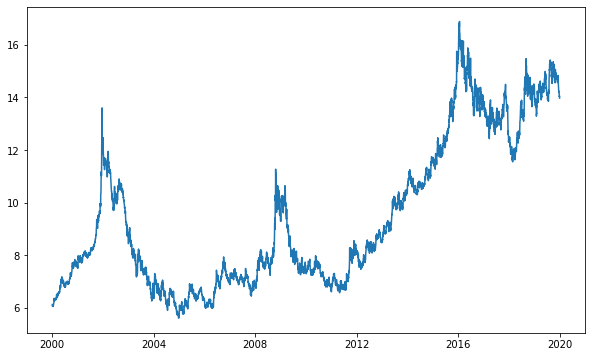

In [10]:
#South Africa
plt.plot(selected_currencies['SOUTH AFRICA - RAND/US$']);

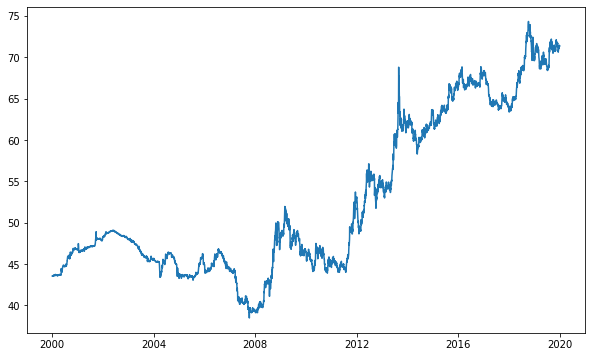

In [11]:
#India
plt.plot(selected_currencies['INDIA - INDIAN RUPEE/US$']);

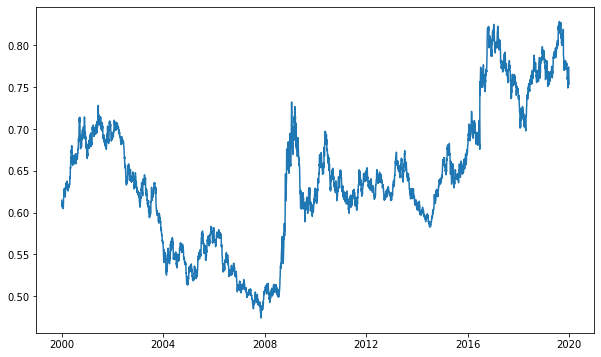

In [12]:
#South Africa
plt.plot(selected_currencies['UNITED KINGDOM - UNITED KINGDOM POUND/US$']);

In [13]:
selected_currencies['UNITED KINGDOM - UNITED KINGDOM POUND/US$'].min()

0.4738

In [14]:
selected_currencies['UNITED KINGDOM - UNITED KINGDOM POUND/US$'].max()

0.8287

In [15]:
selected_currencies['UNITED KINGDOM - UNITED KINGDOM POUND/US$'].mean()

0.6404656430707876

## make a regression analysis of united kingdom and india (not yet completed)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
Reg_UK_Ind = selected_currencies[['UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'INDIA - INDIAN RUPEE/US$']]

In [18]:
rupee = Reg_UK_Ind['INDIA - INDIAN RUPEE/US$']

In [19]:
x_train,x_test, y_train, y_test = train_test_split(Reg_UK_Ind ,rupee, test_size = 0.25, random_state = 42)


In [20]:
# fit the linear model to the training data
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
prediction = linear_model.predict(x_test)

In [21]:
print (prediction)

[69.49 45.3  62.23 ... 48.17 68.53 48.08]


In [22]:
from sklearn.metrics import mean_squared_error  
mse = mean_squared_error(y_test, prediction)

In [23]:
mse

4.9802663592134816e-29